In [6]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set()

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
v_1 = np.array([[3/5],[4/5]])
v_2 = np.array([[-4/5],[3/5]])
V = np.squeeze(np.array([v_1,v_2])).T
variance = 1
n = 100 


In [57]:
?np.random.randn

Text(0.5,0,'x1')

Text(0,0.5,'y1')

Text(0.5,1,'wstar=[[2],[3]], diag(Lambda) = [1,1]')

Text(0.5,0,'x1')

Text(0,0.5,'y1')

Text(0.5,1,'wstar=[[2],[3]], diag(Lambda) = [8,1]')

Text(0.5,0,'x1')

Text(0,0.5,'y1')

Text(0.5,1,'wstar=[[2],[3]], diag(Lambda) = [1,8]')

Text(0.5,0,'x1')

Text(0,0.5,'y1')

Text(0.5,1,'wstar=[[-4],[3]], diag(Lambda) = [8,1]')

Text(0.5,0,'x1')

Text(0,0.5,'y1')

Text(0.5,1,'wstar=[[0],[4]], diag(Lambda) = [8,1]')

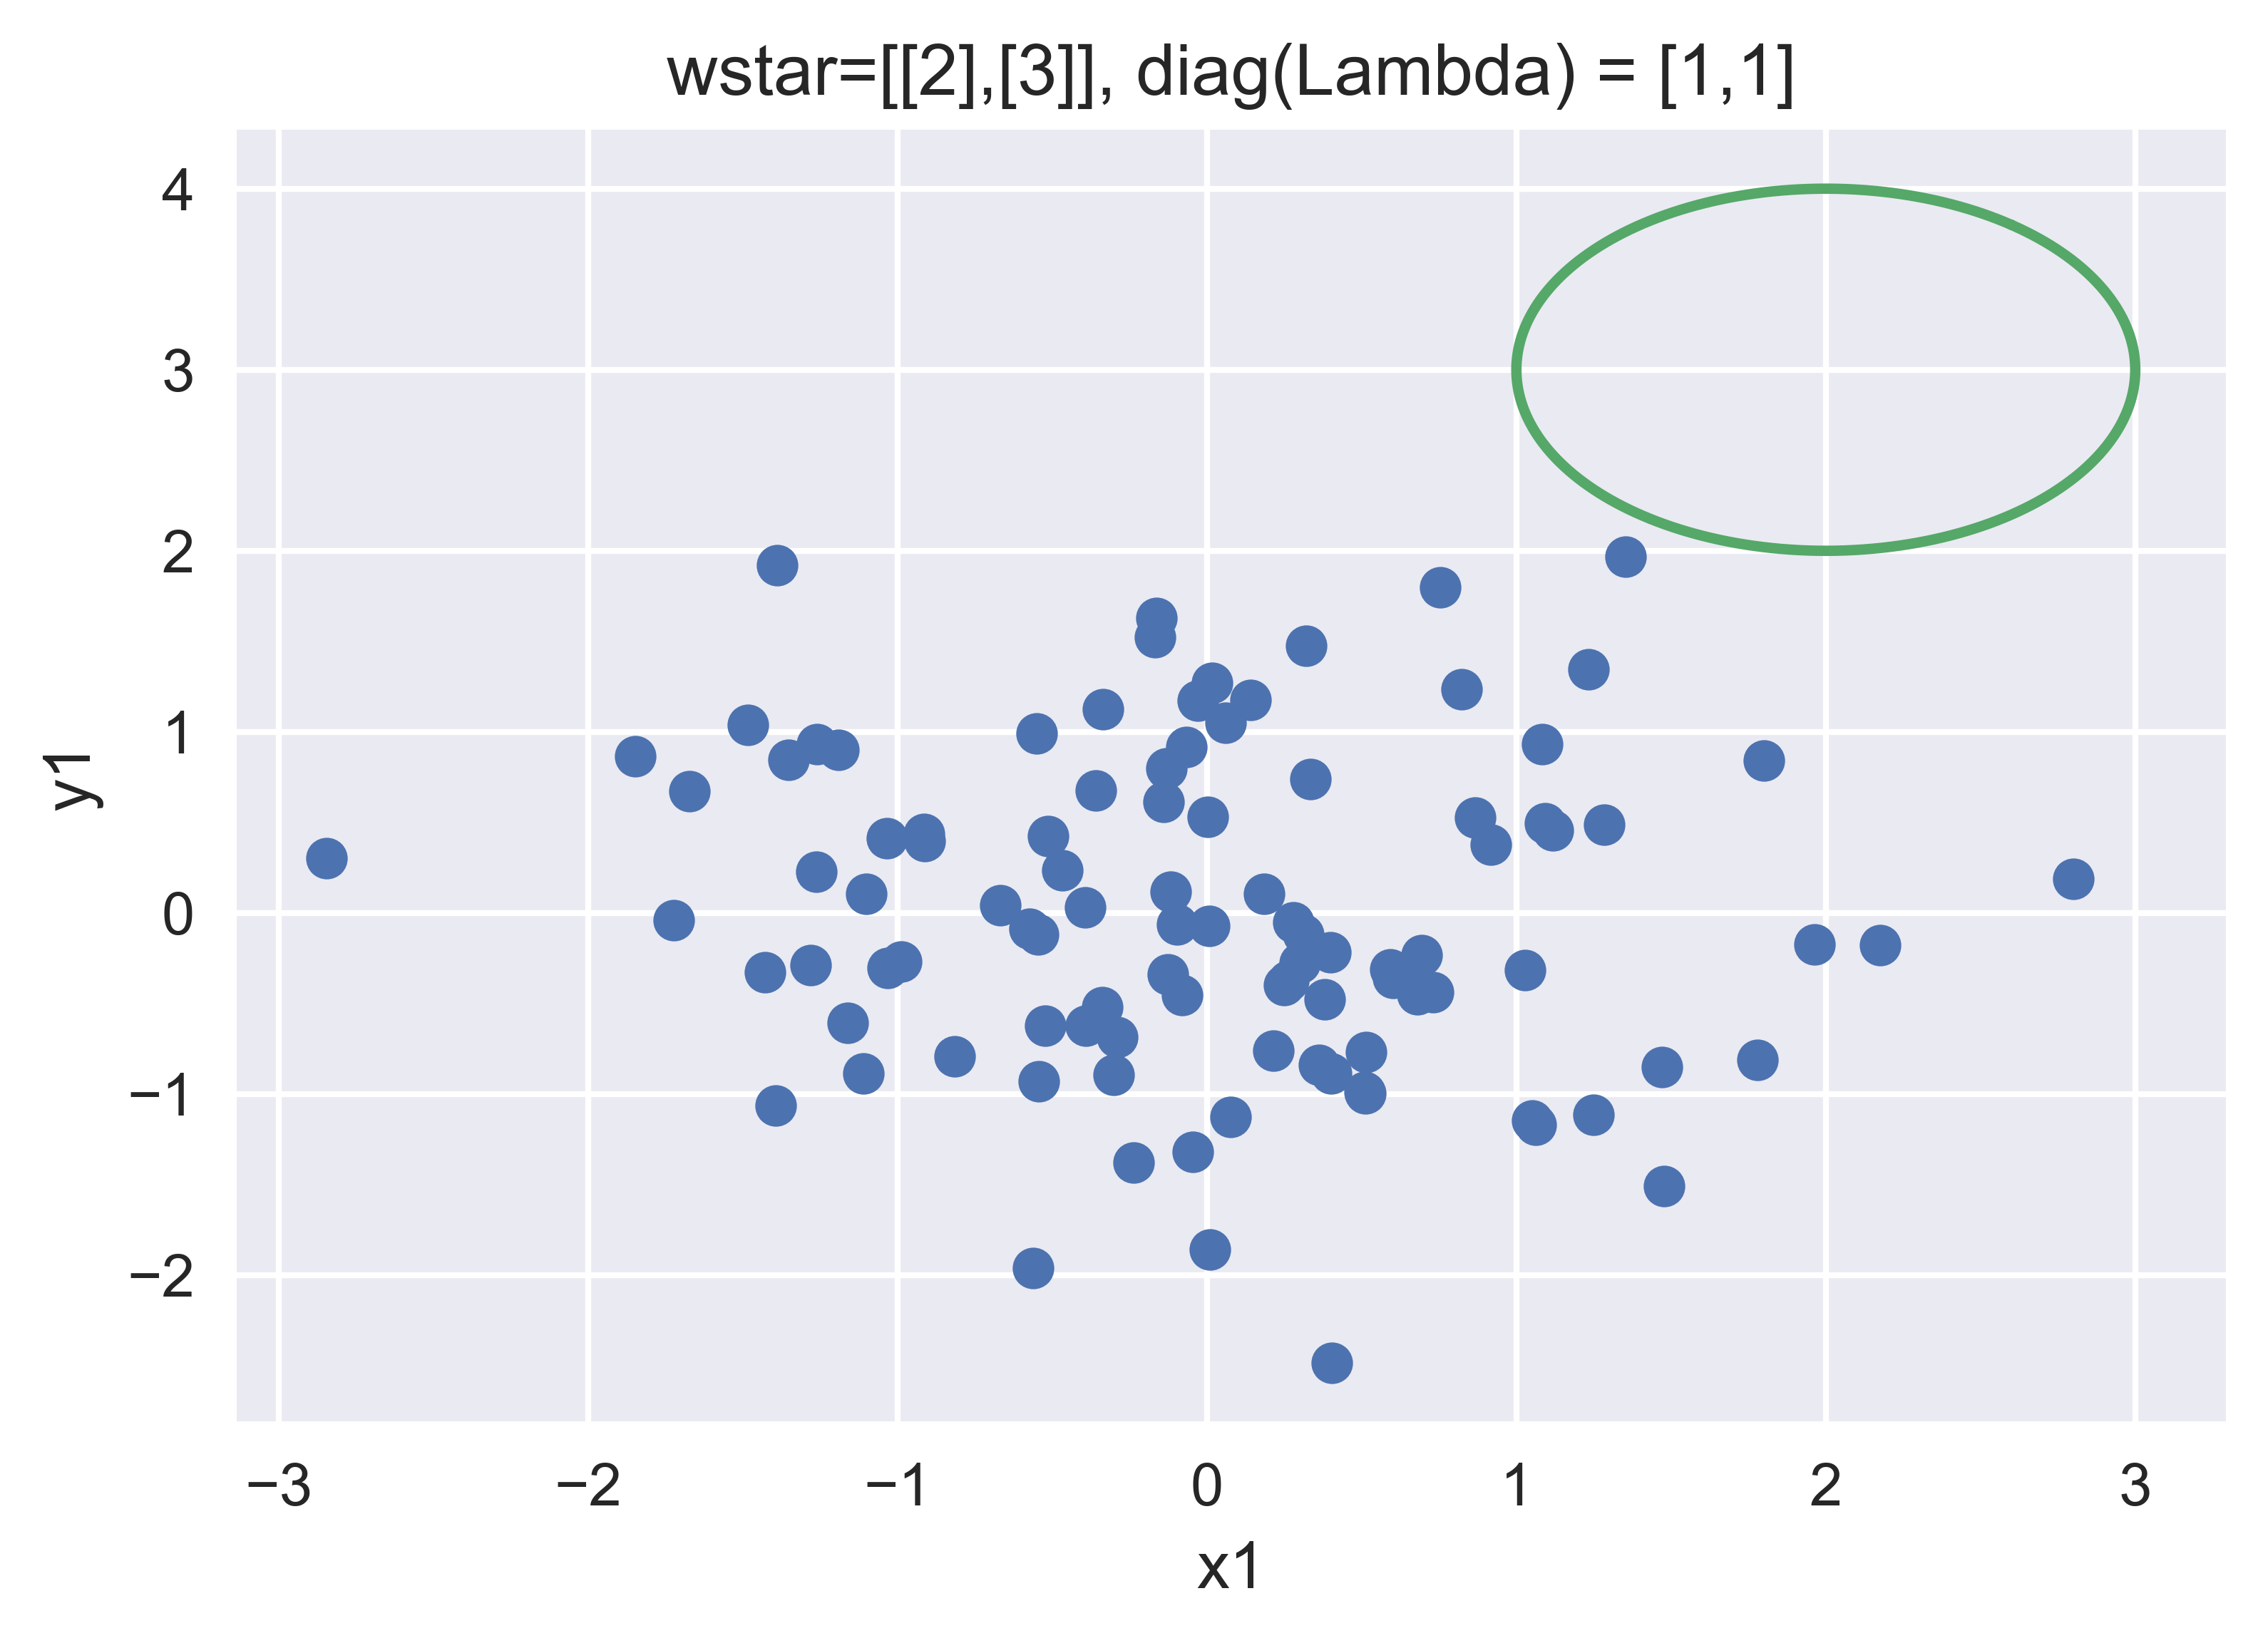

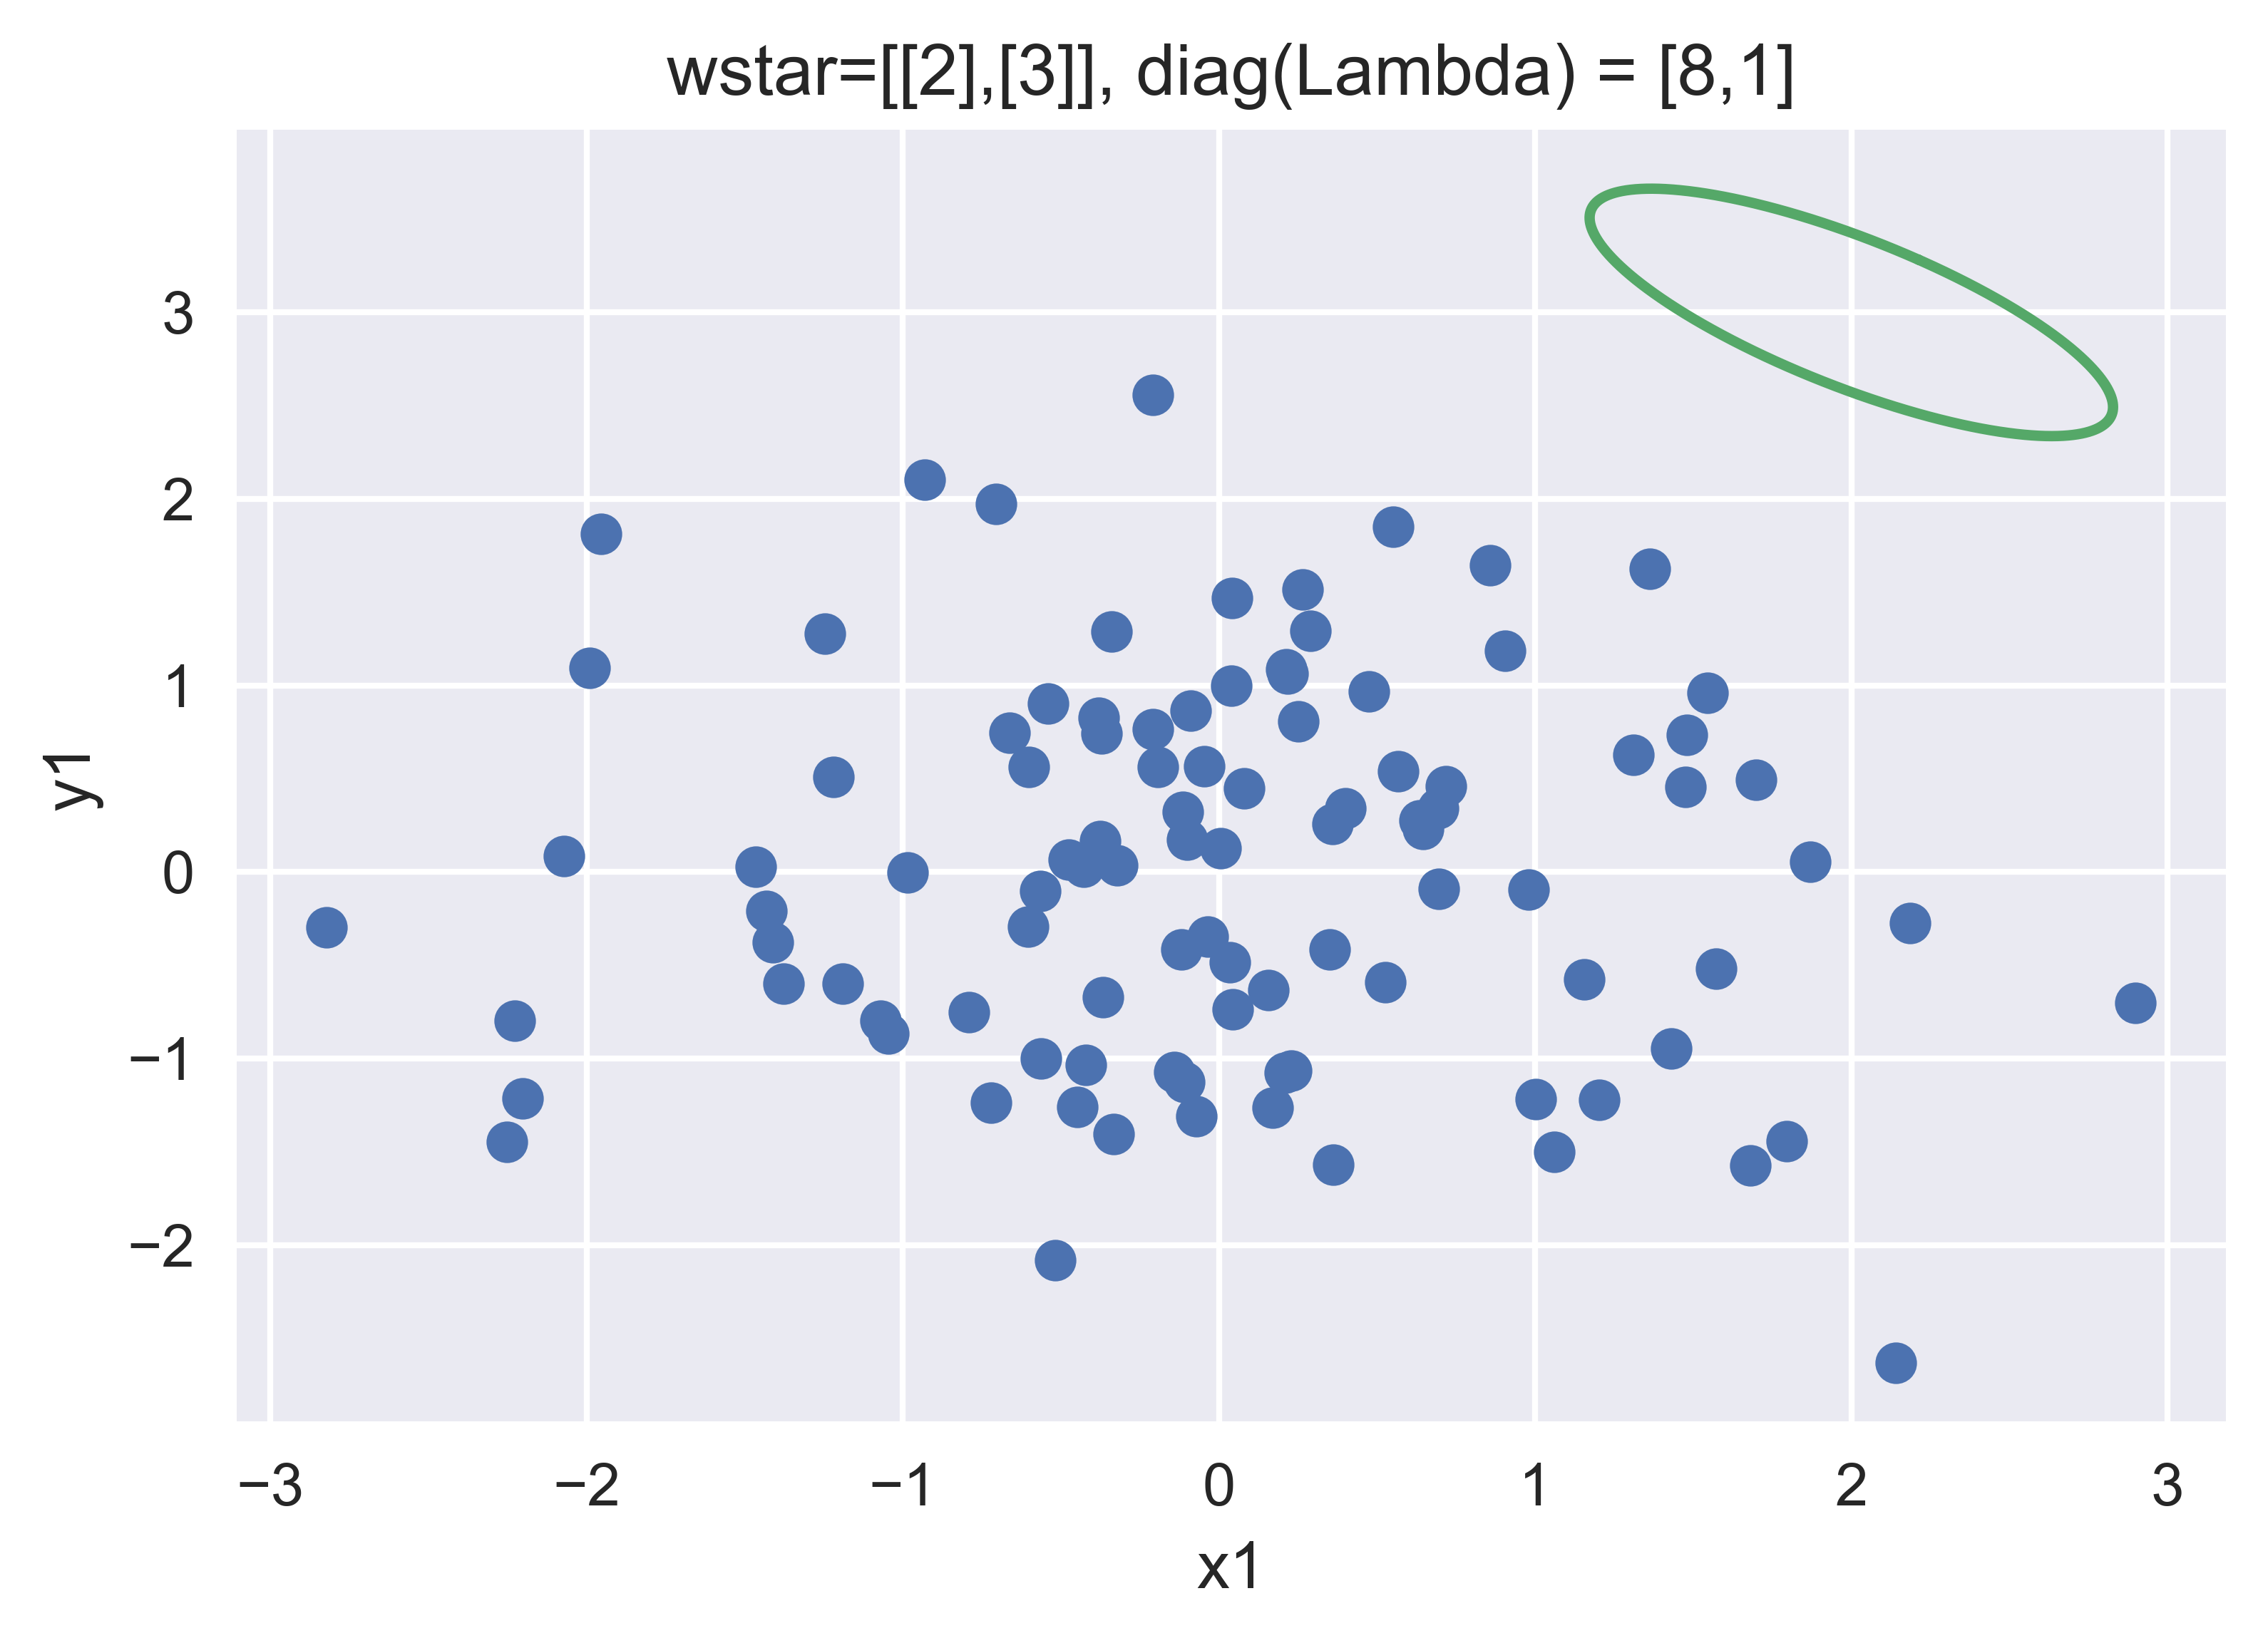

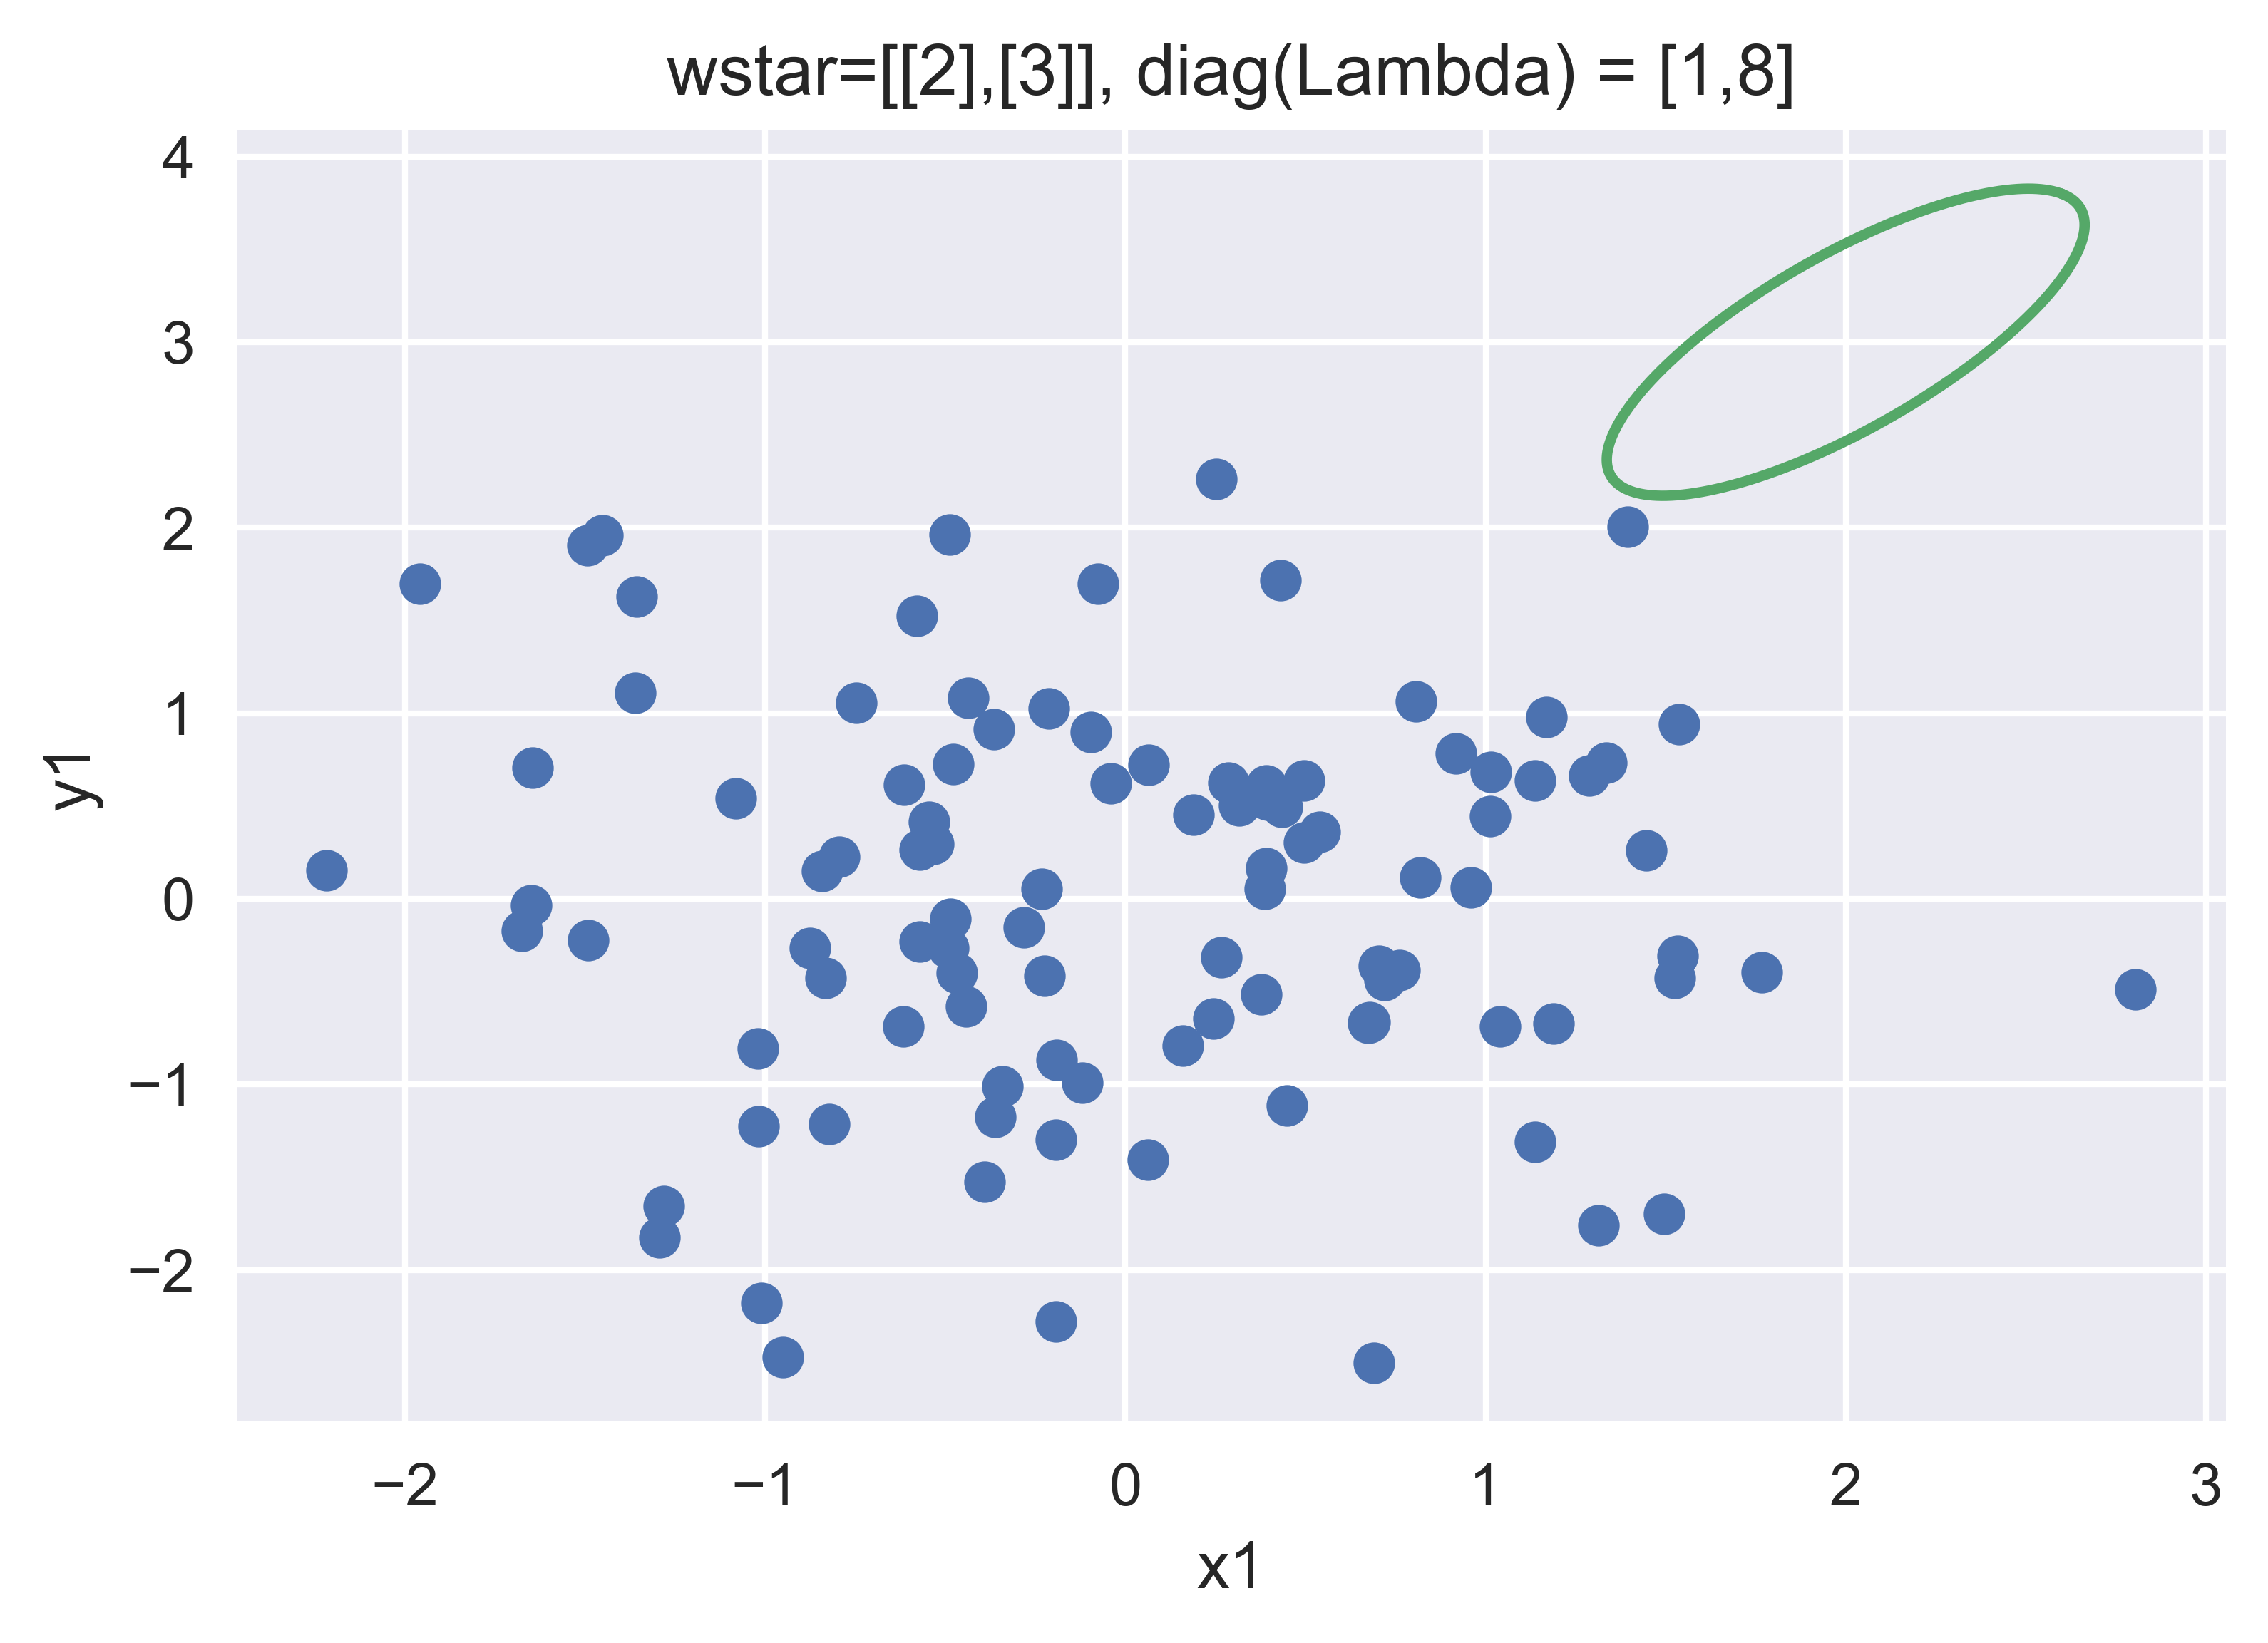

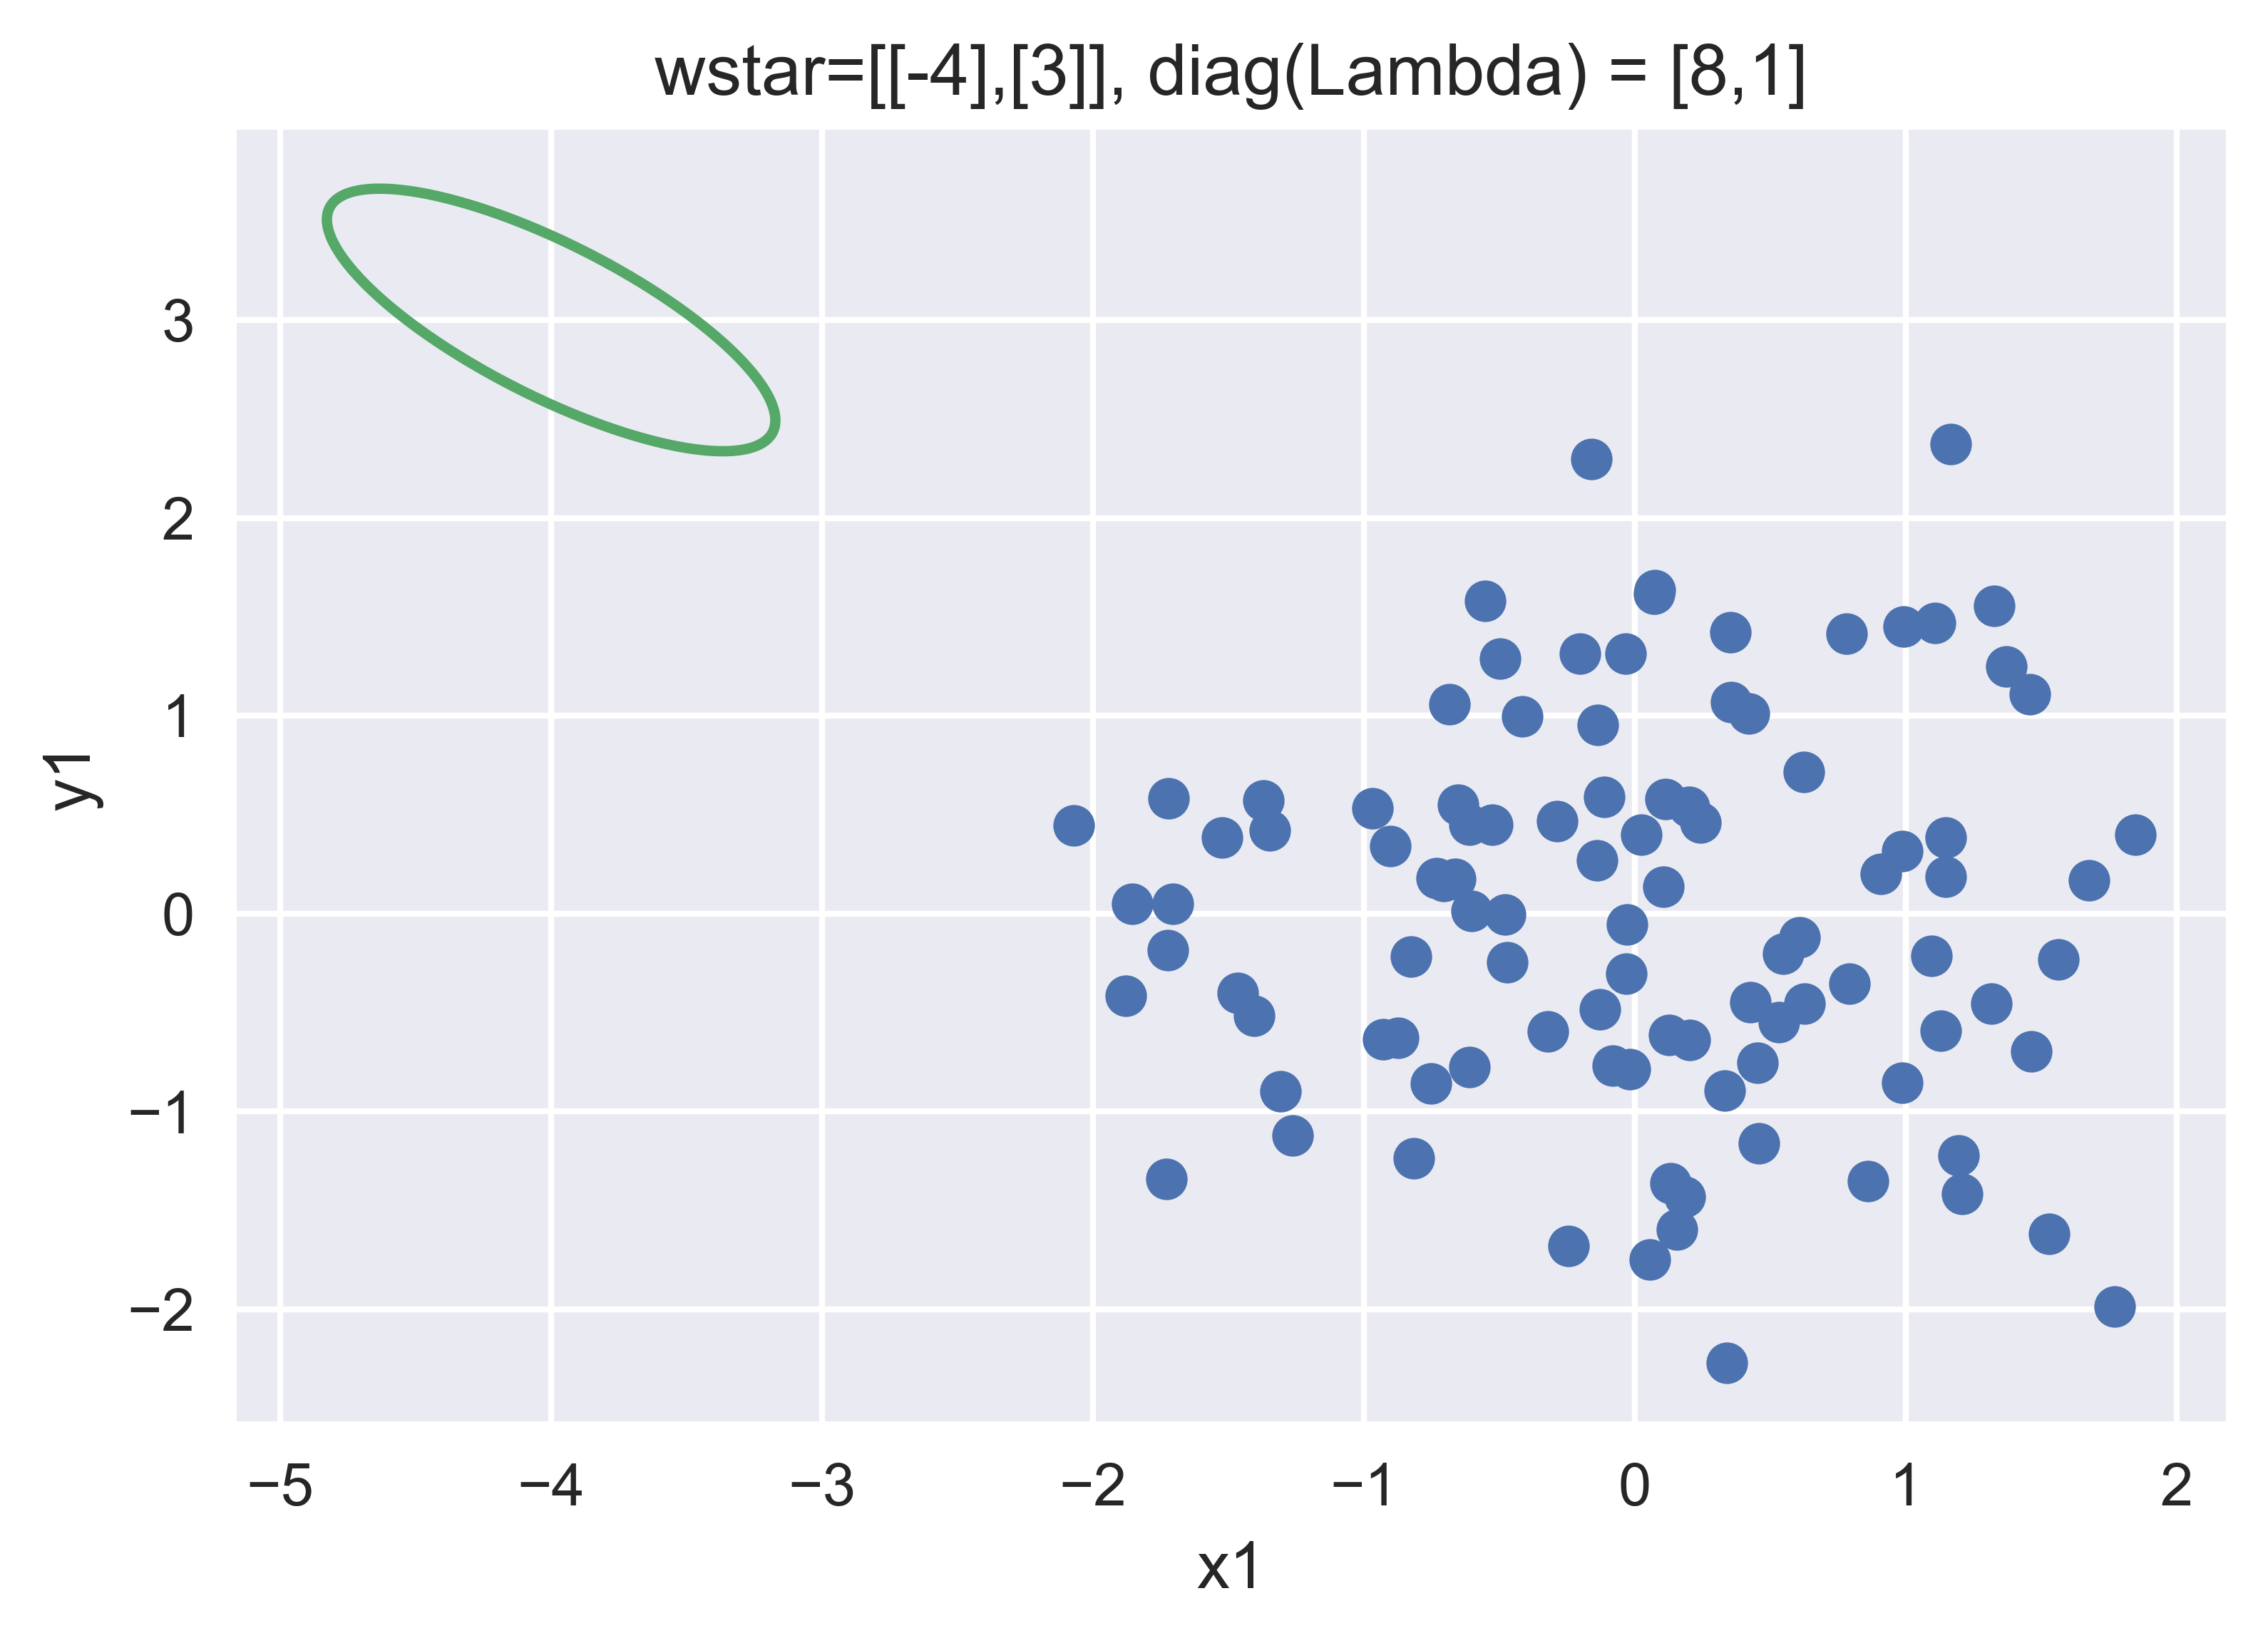

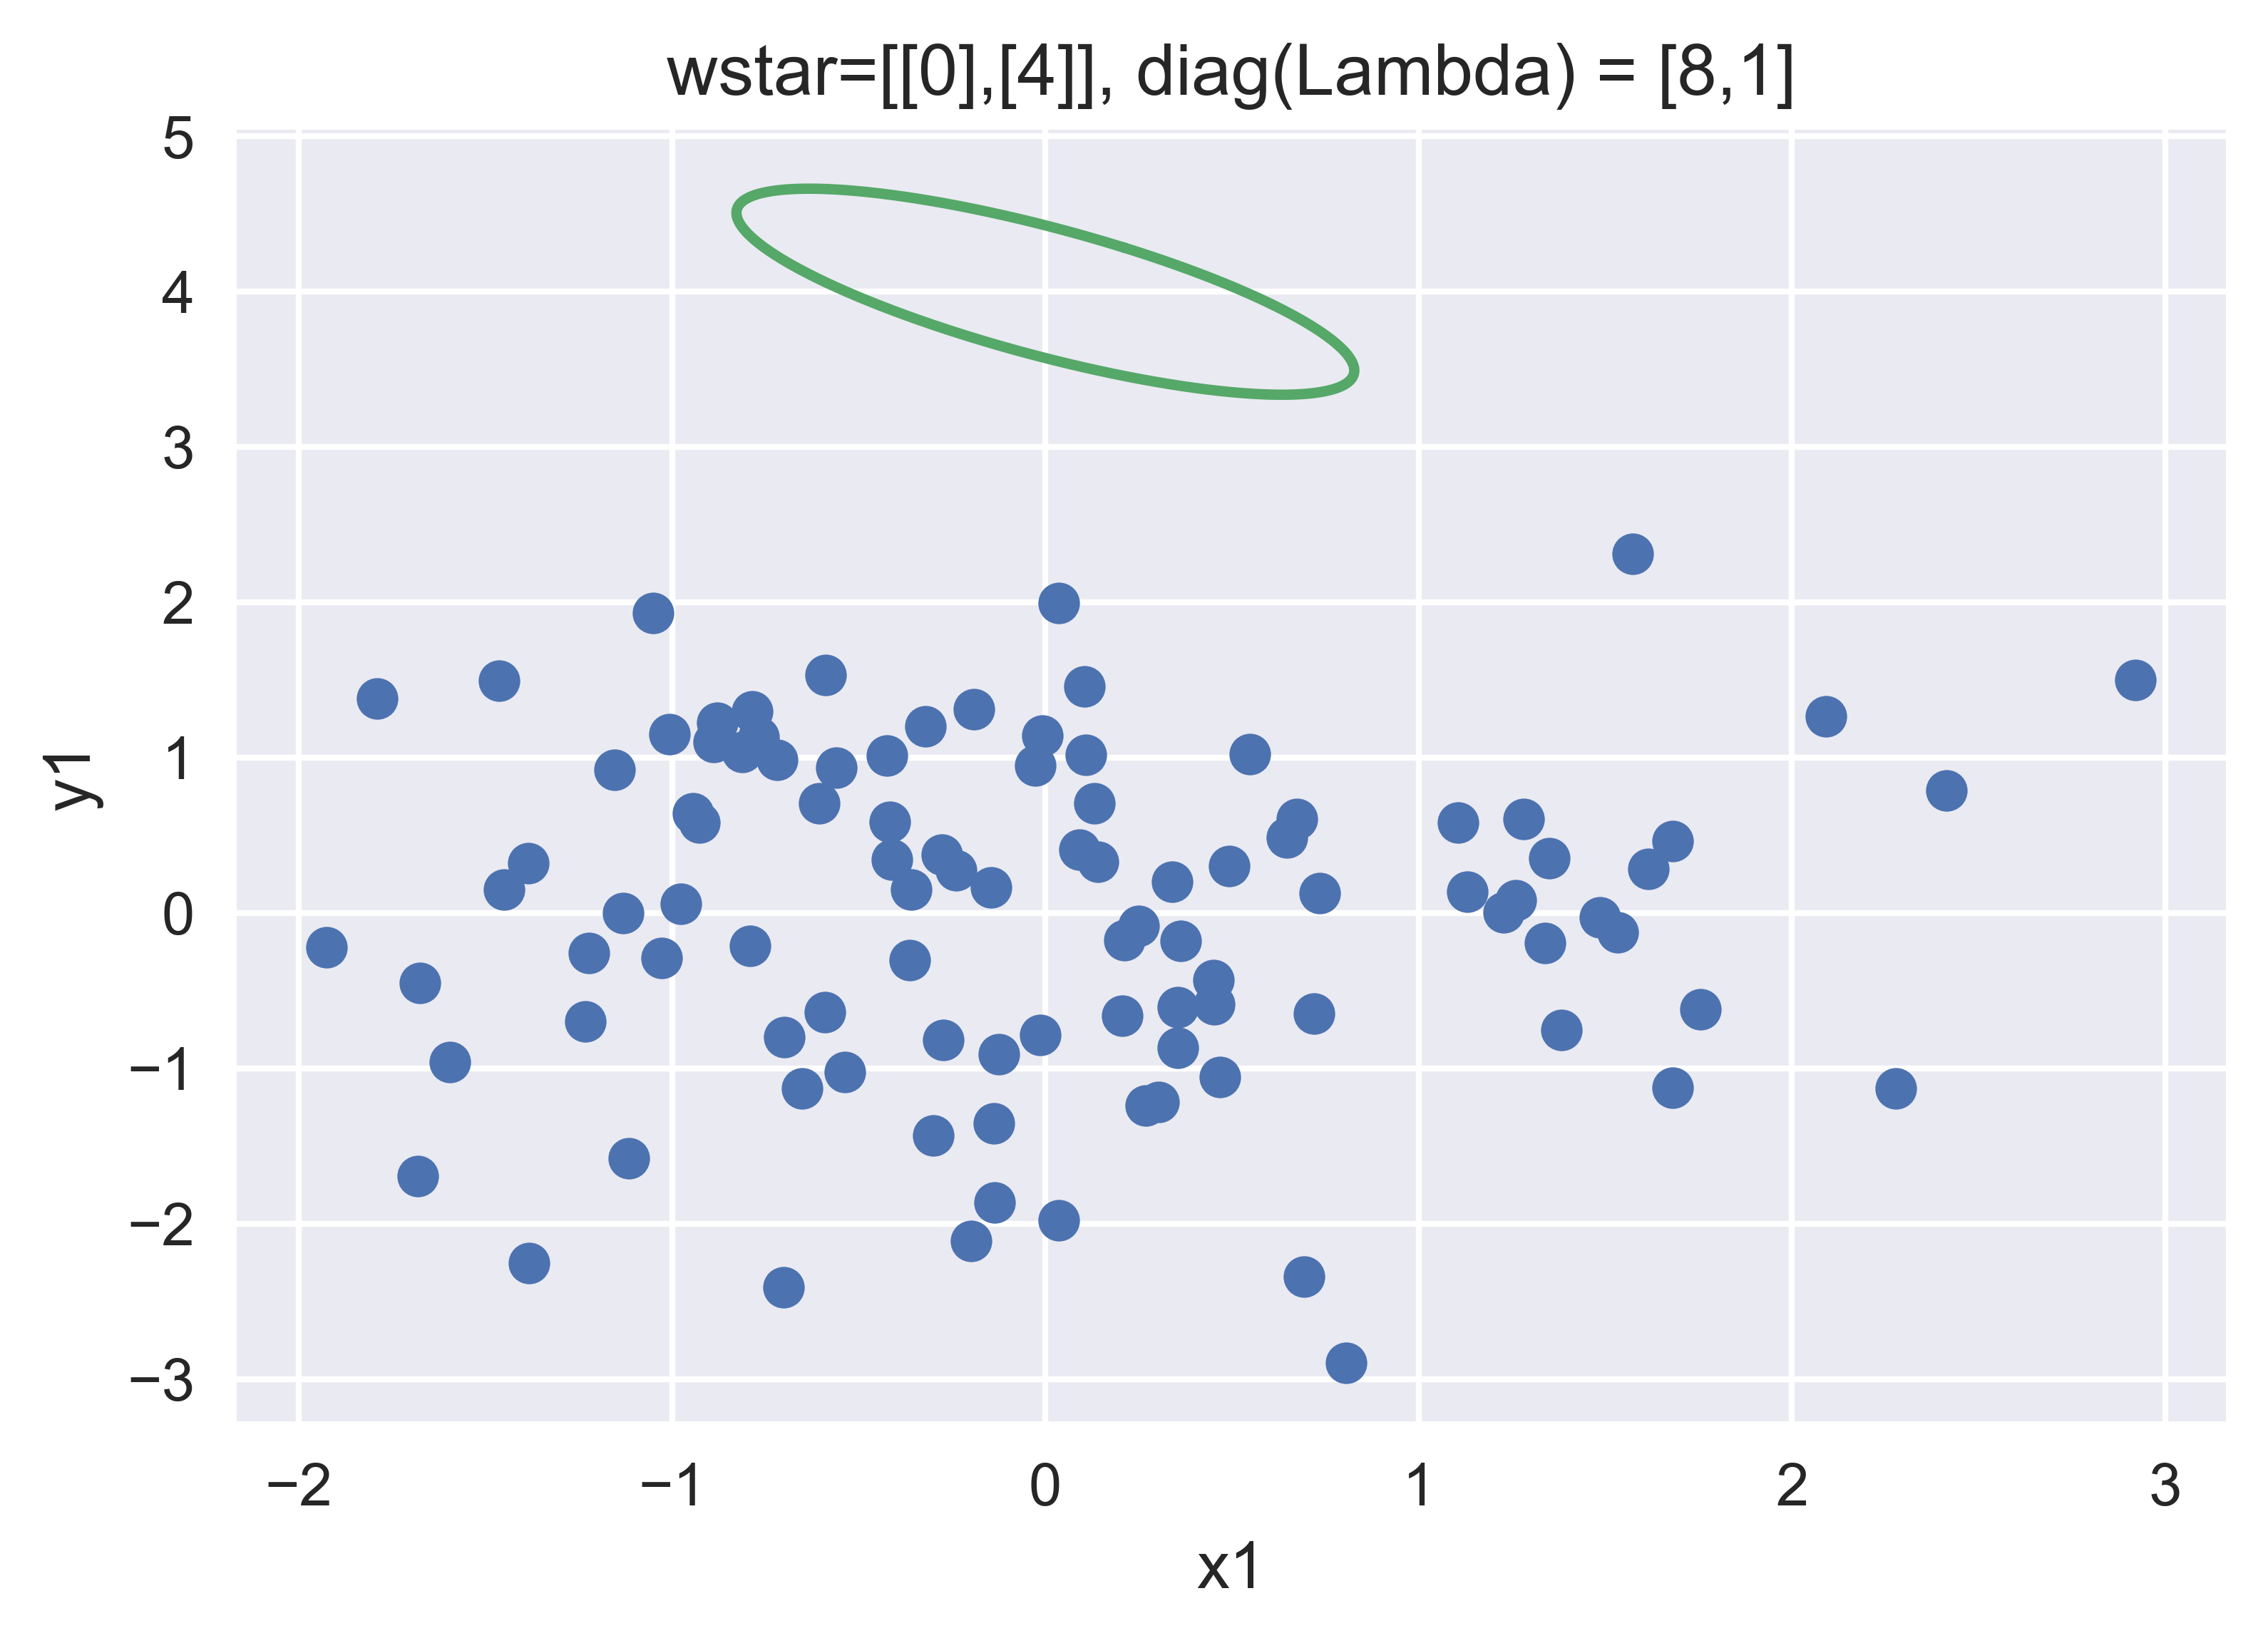

In [58]:
params_int_zipped = zip([np.array([[2,3]]).T,
                  np.array([[2,3]]).T,
                  np.array([[2,3]]).T,
                  np.array([[-4,3]]).T,
                  np.array([[0,4]]).T],
                 [1,8,1,8,8],
                 [1,1,8,1,1])
iteration = 1
for params in params_int_zipped:
    x_vec = np.random.randn(2,n)
    # solve for z
    b = np.zeros(((x_vec.shape[0]),1))
    A = np.zeros
    n = x_vec.shape[1]

    
    w_star = params[0]
    lambda_1 = params[1]
    lambda_2 = params[2]
    sigma = np.diag([lambda_1,lambda_2])
    sigma_neghalf = scipy.linalg.sqrtm(np.linalg.inv(sigma))
    
    A = np.dot(V,sigma_neghalf)
    trans_x = np.dot(A,x_vec)
    
    b[0] = -(1/n)*np.sum(trans_x[0,:])
    b[1] = -(1/n)*np.sum(trans_x[1,:])
    
    z = trans_x + b
    
    # confidence ellipsoid

    theta = np.arange(0,2*np.pi,0.001)
    cos_sin = np.array([np.cos(theta),np.sin(theta)])
    v_sig = np.dot(V,sigma_neghalf)
    u = np.dot(v_sig,cos_sin)
    u = u + w_star
    
    plt.figure(dpi=600)
    plt.plot(z[0,:],z[1,:],'o',label='z')
    plt.plot(u[0,:],u[1,:],label='confidence ellipsoid')
    plt.xlabel('x1')
    plt.ylabel('y1')
    plt.title('wstar=[{},{}], diag(Lambda) = [{},{}]'.format(w_star[0],w_star[1],lambda_1,lambda_2))
    #plt.savefig("hw3_prob1_iter_{}".format(iteration))
    iteration += 1

In [10]:
A

array([[ 0.21213203, -0.8       ],
       [ 0.28284271,  0.6       ]])

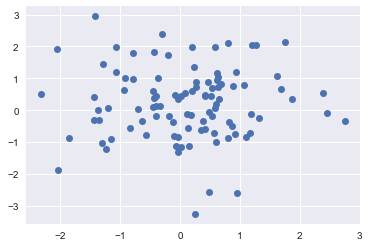

In [13]:
plt.plot(x_vec[0,:],x_vec[1,:],'o')

In [14]:
x_vec.shape

(2, 100)

In [15]:
np.cov(x_vec)

array([[ 0.9792155 ,  0.00888252],
       [ 0.00888252,  1.22313921]])

In [16]:
np.cov(z)

array([[ 0.82385896, -0.52923322],
       [-0.52923322,  0.52168218]])

In [49]:
x_vec = np.random.randn(2,n)
# solve for z
b = np.zeros(((x_vec.shape[0]),1))
A = np.zeros
n = x_vec.shape[1]


w_star = params[0]
lambda_1 = params[1]
lambda_2 = params[2]
sigma = np.diag([lambda_1,lambda_2])
sigma_neghalf = scipy.linalg.sqrtm(np.linalg.inv(sigma))
sigma_half = scipy.linalg.sqrtm(sigma)

A = np.dot(V,sigma_neghalf)
trans_x = np.dot(A,x_vec)

b[0] = -(1/n)*np.sum(trans_x[0,:])
b[1] = -(1/n)*np.sum(trans_x[1,:])
z = trans_x + b

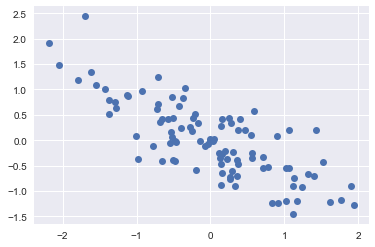

In [50]:
plt.plot(z[0,:],z[1,:],'o')

In [60]:
A.T

array([[ 0.21213203,  0.28284271],
       [-0.8       ,  0.6       ]])